# Playing with karabo

In [1]:
import os
import sys

sys.path.insert(0, '/Users/patoch/Desktop/Patoch/Uni/2nd-Year/MasterThesis/master-thesis/Karabo-Pipeline')
from karabo.imaging import image
from karabo.sourcedetection import result

from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits

import numpy as np
import matplotlib.pyplot as plt

In [2]:
clean_path = '/Users/patoch/Desktop/Patoch/Uni/2nd-Year/MasterThesis/master-thesis/Dataset.nosync/clean_gaussian/clean_gaussians_0a0fe628-6c50-4f7a-ba0f-b8942c84e00d.fits'

## Plotting with Matplotlib

(512, 512)


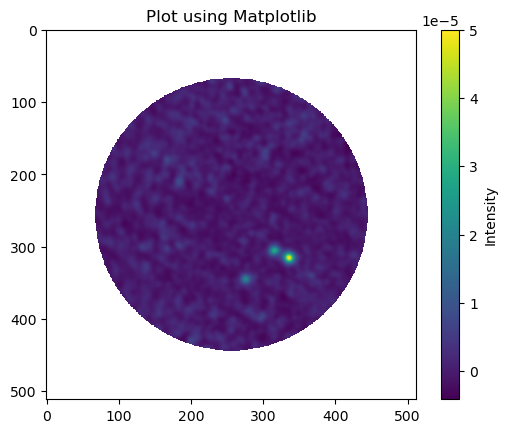

In [3]:
clean_img = get_pkg_data_filename(clean_path)
clean_img = fits.getdata(clean_img, ext=0)
print(clean_img[0,0,:,:].shape)

plt.figure()
plt.imshow(clean_img[0,0,:,:] )
plt.title('Plot using Matplotlib')
plt.colorbar(label='Intensity')


# Import an image and plot it using Karabo

In [4]:
# sys.path.append('/Users/patoch/Desktop/Patoch/Uni/2nd-Year/MasterThesis/master-thesis/Karabo-Pipeline/karabo')
sys.path.insert(0, '/Users/patoch/Desktop/Patoch/Uni/2nd-Year/MasterThesis/master-thesis/Karabo-Pipeline')
from karabo.imaging import image
from karabo.sourcedetection import result

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


WCS Keywords

Number of WCS axes: 4
CTYPE : 'RA---SIN'  'DEC--SIN'  'FREQ'  'STOKES'  
CRVAL : 150.9571666667  3.855833333333  229996100000.0  1.0  
CRPIX : 257.0  257.0  1.0  1.0  
PC1_1 PC1_2 PC1_3 PC1_4  : 1.0  0.0  0.0  0.0  
PC2_1 PC2_2 PC2_3 PC2_4  : 0.0  1.0  0.0  0.0  
PC3_1 PC3_2 PC3_3 PC3_4  : 0.0  0.0  1.0  0.0  
PC4_1 PC4_2 PC4_3 PC4_4  : 0.0  0.0  0.0  1.0  
CDELT : -2.777777777778e-05  2.777777777778e-05  1872000000.0  1.0  
NAXIS : 512  512  1  1


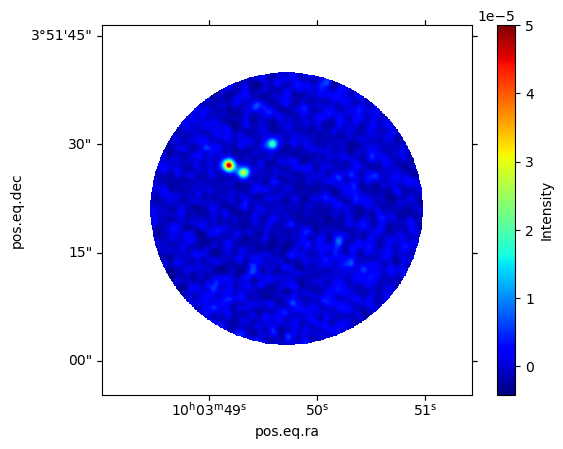

In [5]:
clean_img_k = image.Image.read_from_file(clean_path)
# print(clean_img_k.header)
clean_img_k.plot('Intensity')


In [6]:
print(clean_img_k.get_dimensions_of_image())

[512, 512, 1, 1]


In [7]:
print(clean_path)
print(clean_img_k.file)
print(clean_img_k.file.path)

/Users/patoch/Desktop/Patoch/Uni/2nd-Year/MasterThesis/master-thesis/Dataset.nosync/clean_gaussian/clean_gaussians_0a0fe628-6c50-4f7a-ba0f-b8942c84e00d.fits
/Users/patoch/Desktop/Patoch/Uni/2nd-Year/MasterThesis/master-thesis/KaraboTests/.tmp/9257cb28-3023-480e-acfd-33a0ab52911c


In [8]:
detection_result = result.SourceDetectionResult.detect_sources_in_image(clean_img_k)

--> Opened '/Users/patoch/Desktop/Patoch/Uni/2nd-Year/MasterThesis/master-thesis/KaraboTests/.tmp/9257cb28-3023-480e-acfd-33a0ab52911c'
Image size .............................. : (512, 512) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (2.47657e-04, 2.31258e-04, 81.7) degrees
Frequency of image ...................... : 229996.100 MHz
Number of blank pixels .................. : 149423 (56.99999999999999%)
Flux from sum of (non-blank) pixels ..... : 0.000 Jy
--> Calculating background rms and mean images
/Users/patoch/opt/anaconda3/envs/karabo_env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray

Fitting islands with Gaussians .......... : [|] 0/5

stty: stdin isn't a terminal
stty: stdin isn't a terminal


////Fitting islands with Gaussians .......... : [/] 1/5Fitting islands with Gaussians .......... : [/] 1/5Fitting islands with Gaussians .......... : [/] 1/5Fitting islands with Gaussians .......... : [/] 1/5Fitting islands with Gaussians .......... : [] 5/5[-4GFitting islands with Gaussians .......... : [] 5/5[-4G

stty: stdin isn't a terminal
stty: stdin isn't a terminal
stty: stdin isn't a terminal
stty: stdin isn't a terminal
stty: stdin isn't a terminal
stty: stdin isn't a terminal
Total number of Gaussians fit to image .. : 6
Total flux density in model ............. : 0.000 Jy


stty: stdin isn't a terminal
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 6


--> Wrote ASCII file '/Users/patoch/Desktop/Patoch/Uni/2nd-Year/MasterThesis/master-thesis/KaraboTests/.tmp/6f418a61-37d2-4f5a-a046-e1a9682227c8'
--> Wrote file '/Users/patoch/Desktop/Patoch/Uni/2nd-Year/MasterThesis/master-thesis/KaraboTests/.tmp/6d2d4a42-15a0-4396-895c-e6b0cdcc140c'


In [9]:
pos = detection_result.get_pixel_position_of_sources()
print(pos)


[[183.9378806  247.0587698  276.20826587 335.91304879 315.6793598
  366.27024645]
 [210.52050668 125.50149514 345.65464737 315.980685   306.02161869
  340.35557154]]


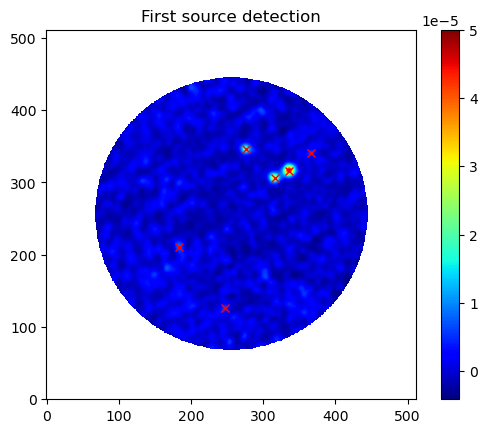

In [10]:
plt.figure()
plt.title('First source detection')
plt.imshow(clean_img_k.data[0][0], cmap="jet", origin='lower')
plt.plot(pos[0], pos[1], 'x', color='red')
plt.colorbar()
plt.show()


## testing with different parametters:

### Beam parameters
This parameter is a tuple (default is None) that defines the FWHM of restoring beam. Specify as (maj, min, pos ang E of N) in degrees. E.g., beam = (0.06, 0.02, 13.3). For more than one channel, use the beam_spectrum parameter. If the beam is not given by the user, then it is looked for in the image header. If not found, then an error is raised. PyBDSF will not work without knowledge of the restoring beam.



/Users/patoch/opt/anaconda3/envs/karabo_env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)
stty: stdin isn't a terminal
stty: stdin isn't a terminal


--> Wrote ASCII file '/Users/patoch/Desktop/Patoch/Uni/2nd-Year/MasterThesis/master-thesis/KaraboTests/.tmp/05edb4fa-652a-4edc-ada8-2c34fc19ca83'
--> Wrote file '/Users/patoch/Desktop/Patoch/Uni/2nd-Year/MasterThesis/master-thesis/KaraboTests/.tmp/a7c85237-4a5b-471d-9f85-8c0921df27ba'
[[183.9378806  247.0587698  276.20826587 335.91304879 315.6793598
  366.27024645]
 [210.52050668 125.50149514 345.65464737 315.980685   306.02161869
  340.35557154]]


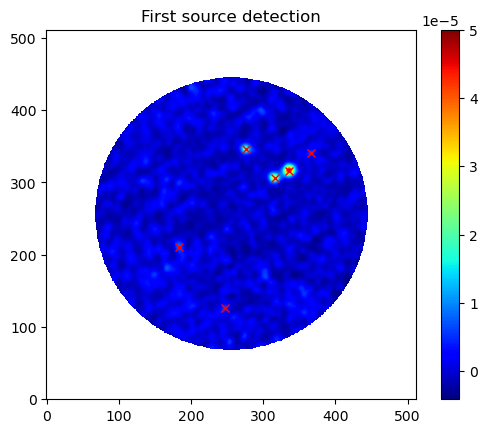

In [11]:
# Get the header of the fits file
header = fits.getheader(clean_path)

# Get the data of the fits file
bmaj = header['BMAJ']
bmin = header['BMIN']
bpos = header['BPA']

# do the detection:
detection_result = result.SourceDetectionResult.detect_sources_in_image(clean_img_k, quiet=True, beam=(bmaj, bmin, bpos))
pos = detection_result.get_pixel_position_of_sources()
print(pos)
plt.figure()
plt.title('First source detection')
plt.imshow(clean_img_k.data[0][0], cmap="jet", origin='lower')
plt.plot(pos[0], pos[1], 'x', color='red')
plt.colorbar()
plt.show()


It seems like there is no improvement specifying the beam.

### Quiet parametter
Seems like it reduce the texte displayed in the terminal

/Users/patoch/opt/anaconda3/envs/karabo_env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)
stty: stdin isn't a terminal
stty: stdin isn't a terminal


--> Wrote ASCII file '/Users/patoch/Desktop/Patoch/Uni/2nd-Year/MasterThesis/master-thesis/KaraboTests/.tmp/eca7c959-5f0f-430b-ad93-e93df69f9622'
--> Wrote file '/Users/patoch/Desktop/Patoch/Uni/2nd-Year/MasterThesis/master-thesis/KaraboTests/.tmp/c0aa9da5-f5bf-47e5-bda0-0605281f8574'


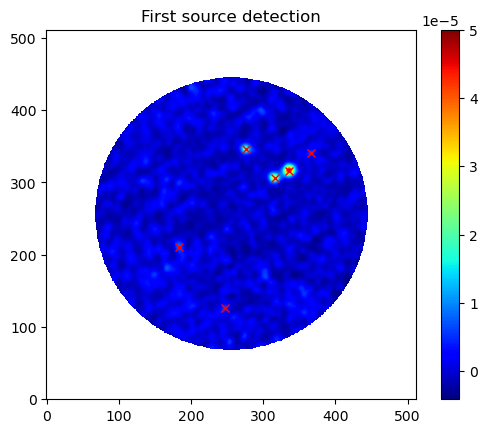

In [12]:
detection_result = result.SourceDetectionResult.detect_sources_in_image(clean_img_k, quiet=True)
pos = detection_result.get_pixel_position_of_sources()

plt.figure()
plt.title('First source detection')
plt.imshow(clean_img_k.data[0][0], cmap="jet", origin='lower')
plt.plot(pos[0], pos[1], 'x', color='red')
plt.colorbar()
plt.show()

# Testing with other fits files:

In [13]:
dir_path = '/Users/patoch/Desktop/Patoch/Uni/2nd-Year/MasterThesis/master-thesis/Dataset.nosync/clean_gaussian' 

---- it =  0  ----


ERROR: A region with an unphysical rms value has been found. Please check the input image.


Nan in file:  /Users/patoch/Desktop/Patoch/Uni/2nd-Year/MasterThesis/master-thesis/Dataset.nosync/clean_gaussian/clean_gaussians_bc4ac6c6-85fd-40aa-960c-eca85e60faf1.fits
---- it =  0  ----


/Users/patoch/opt/anaconda3/envs/karabo_env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)
stty: stdin isn't a terminal
stty: stdin isn't a terminal


--> Wrote ASCII file '/Users/patoch/Desktop/Patoch/Uni/2nd-Year/MasterThesis/master-thesis/KaraboTests/.tmp/5d277700-9d5d-4530-82cf-73813f1d0692'
--> Wrote file '/Users/patoch/Desktop/Patoch/Uni/2nd-Year/MasterThesis/master-thesis/KaraboTests/.tmp/651bd0c9-8460-4a6f-9ebd-27268a08f709'
---- it =  1  ----


/Users/patoch/opt/anaconda3/envs/karabo_env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)
stty: stdin isn't a terminal
stty: stdin isn't a terminal


--> Wrote ASCII file '/Users/patoch/Desktop/Patoch/Uni/2nd-Year/MasterThesis/master-thesis/KaraboTests/.tmp/1463798d-b731-4ebc-a8b2-e5c70c2bf6eb'
--> Wrote file '/Users/patoch/Desktop/Patoch/Uni/2nd-Year/MasterThesis/master-thesis/KaraboTests/.tmp/42e37da4-2304-48c6-97b8-ded795784275'
---- it =  2  ----


/Users/patoch/opt/anaconda3/envs/karabo_env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)
stty: stdin isn't a terminal
stty: stdin isn't a terminal


--> Wrote ASCII file '/Users/patoch/Desktop/Patoch/Uni/2nd-Year/MasterThesis/master-thesis/KaraboTests/.tmp/1a0f6eb2-7d82-4184-9b23-a8f6a53ff765'
--> Wrote file '/Users/patoch/Desktop/Patoch/Uni/2nd-Year/MasterThesis/master-thesis/KaraboTests/.tmp/205bb8c5-fe10-4f5c-bbe6-f9ed84bfef5a'
---- it =  3  ----


/Users/patoch/opt/anaconda3/envs/karabo_env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)
stty: stdin isn't a terminal
stty: stdin isn't a terminal


--> Wrote ASCII file '/Users/patoch/Desktop/Patoch/Uni/2nd-Year/MasterThesis/master-thesis/KaraboTests/.tmp/2e19f9e7-cdb1-48f0-ad9b-dddb3db2623b'
--> Wrote file '/Users/patoch/Desktop/Patoch/Uni/2nd-Year/MasterThesis/master-thesis/KaraboTests/.tmp/37041654-07b7-4d32-8261-7ac70e67a531'
---- it =  4  ----


/Users/patoch/opt/anaconda3/envs/karabo_env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)
stty: stdin isn't a terminal
stty: stdin isn't a terminal


--> Wrote ASCII file '/Users/patoch/Desktop/Patoch/Uni/2nd-Year/MasterThesis/master-thesis/KaraboTests/.tmp/a06c1ef6-9515-478a-a70a-01bea8b2ed9a'
--> Wrote file '/Users/patoch/Desktop/Patoch/Uni/2nd-Year/MasterThesis/master-thesis/KaraboTests/.tmp/61d1fdcd-58bf-4e96-bc85-f6b4ec653501'
---- it =  5  ----


/Users/patoch/opt/anaconda3/envs/karabo_env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)
stty: stdin isn't a terminal
stty: stdin isn't a terminal


--> Wrote ASCII file '/Users/patoch/Desktop/Patoch/Uni/2nd-Year/MasterThesis/master-thesis/KaraboTests/.tmp/60f7aece-7415-4524-a515-2153a7b00244'
--> Wrote file '/Users/patoch/Desktop/Patoch/Uni/2nd-Year/MasterThesis/master-thesis/KaraboTests/.tmp/81ecc8ef-7eae-4730-b887-151601059091'
---- it =  6  ----


/Users/patoch/opt/anaconda3/envs/karabo_env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)
stty: stdin isn't a terminal
stty: stdin isn't a terminal


--> Wrote ASCII file '/Users/patoch/Desktop/Patoch/Uni/2nd-Year/MasterThesis/master-thesis/KaraboTests/.tmp/b879f63f-dc30-42e0-8482-1c2fa72a10c6'
--> Wrote file '/Users/patoch/Desktop/Patoch/Uni/2nd-Year/MasterThesis/master-thesis/KaraboTests/.tmp/84e67e9d-db38-4977-93a0-29d29cfeee8b'
---- it =  7  ----


ERROR: A region with an unphysical rms value has been found. Please check the input image.


Nan in file:  /Users/patoch/Desktop/Patoch/Uni/2nd-Year/MasterThesis/master-thesis/Dataset.nosync/clean_gaussian/clean_gaussians_aecaefa7-d01f-4a0c-9e60-84ed9db1af2c.fits
---- it =  7  ----


/Users/patoch/opt/anaconda3/envs/karabo_env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)
stty: stdin isn't a terminal
stty: stdin isn't a terminal


--> Wrote ASCII file '/Users/patoch/Desktop/Patoch/Uni/2nd-Year/MasterThesis/master-thesis/KaraboTests/.tmp/f4c1b5ab-fbaa-4a97-80f1-8398d2fe608c'
--> Wrote file '/Users/patoch/Desktop/Patoch/Uni/2nd-Year/MasterThesis/master-thesis/KaraboTests/.tmp/899f38b4-6b7b-4409-ad84-c8b3d971079d'
---- it =  8  ----


/Users/patoch/opt/anaconda3/envs/karabo_env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)
stty: stdin isn't a terminal
stty: stdin isn't a terminal


--> Wrote ASCII file '/Users/patoch/Desktop/Patoch/Uni/2nd-Year/MasterThesis/master-thesis/KaraboTests/.tmp/5c098e1c-b883-40fc-b093-c2f945ce7bdd'
--> Wrote file '/Users/patoch/Desktop/Patoch/Uni/2nd-Year/MasterThesis/master-thesis/KaraboTests/.tmp/ae3dd0c7-6e32-4a4a-9666-8819a9a0ea22'
---- it =  9  ----


/Users/patoch/opt/anaconda3/envs/karabo_env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)
stty: stdin isn't a terminal
stty: stdin isn't a terminal


--> Wrote ASCII file '/Users/patoch/Desktop/Patoch/Uni/2nd-Year/MasterThesis/master-thesis/KaraboTests/.tmp/b76ba6f4-adc4-43e1-b210-8974d17bddc5'
--> Wrote file '/Users/patoch/Desktop/Patoch/Uni/2nd-Year/MasterThesis/master-thesis/KaraboTests/.tmp/2c3a5c54-cd0d-4f59-ae2f-d2a46319c96d'


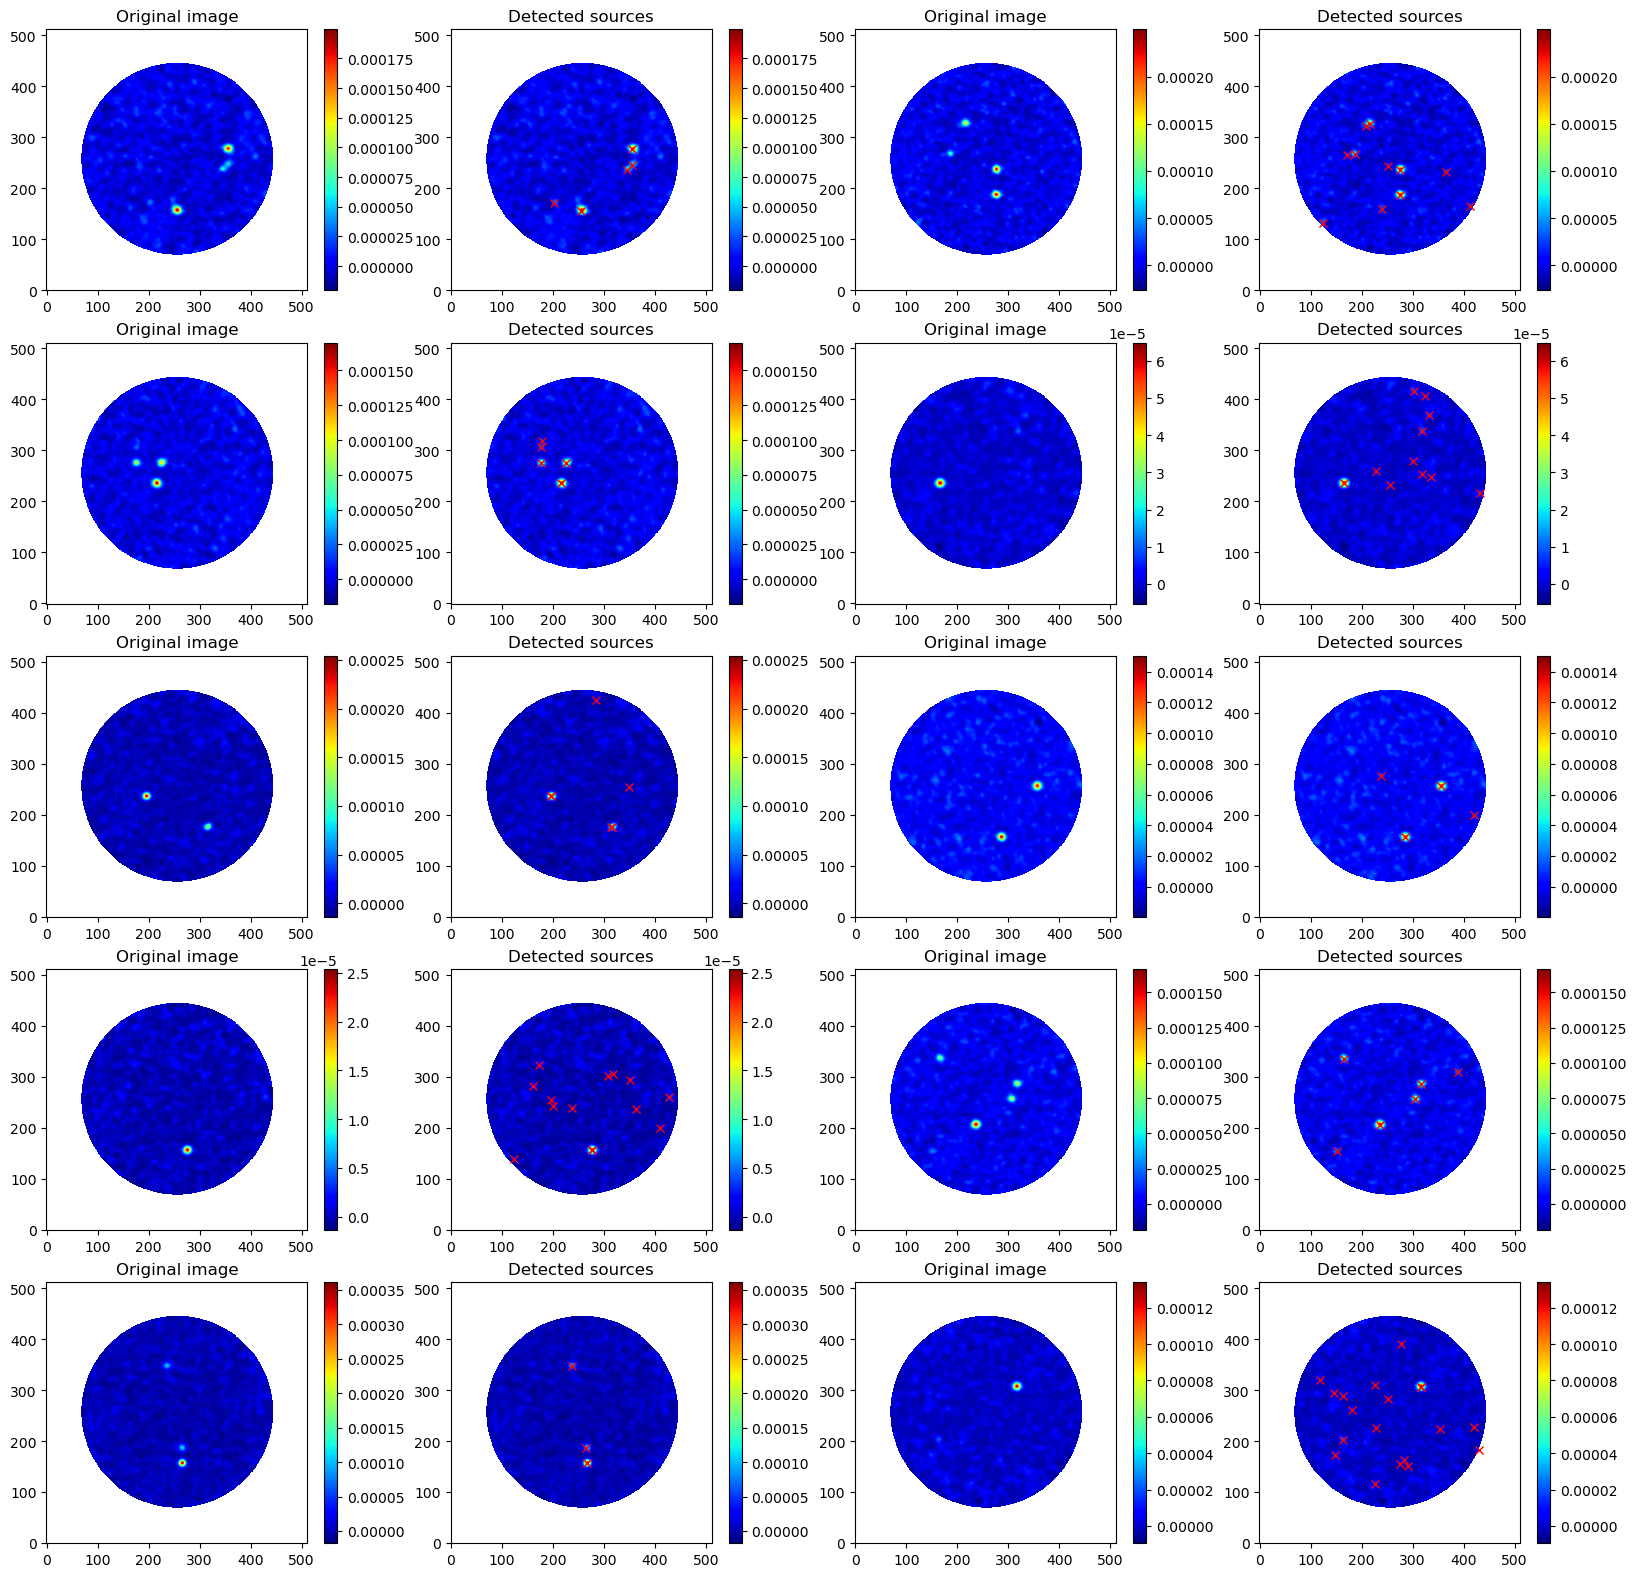

In [15]:
from multiprocessing.resource_sharer import stop


it = 0
nFiles = 10

plt.figure(figsize=(20, 40))
for file in os.listdir(dir_path):
    if it == nFiles:
        break
    
    if file.endswith(".fits"):
        print("---- it = ", it, " ----")
        filePath = os.path.join(dir_path, file)
        
        clean_img_tmp = image.Image.read_from_file(filePath)
        try:
            detection_result = result.SourceDetectionResult.detect_sources_in_image(clean_img_tmp, quiet=True)
            pos = detection_result.get_pixel_position_of_sources()

            plt.subplot(nFiles, 4, it*2+1)
            plt.imshow(clean_img_tmp.data[0][0], cmap="jet", origin='lower')
            plt.title('Original image')
            plt.colorbar()

            plt.subplot(nFiles, 4, it*2+2)
            plt.imshow(clean_img_tmp.data[0][0], cmap="jet", origin='lower')
            plt.plot(pos[0], pos[1], 'x', color='red')
            plt.title('Detected sources')
            plt.colorbar()

            it += 1
        except:
            print("Nan in file: ", filePath)
            continue
        
        # if np.isnan(clean_img_tmp.data[0][0]).any():
        #     clean_img_tmp.data[0][0] = np.nan_to_num(clean_img_tmp.data[0][0])
        #     print(np.isnan(clean_img_tmp.data[0][0]).any())

        # detection_result = result.SourceDetectionResult.detect_sources_in_image(clean_img_tmp, quiet=True)
        # pos = detection_result.get_pixel_position_of_sources()

        # plt.subplot(nFiles, 2, it*2+1)
        # plt.imshow(clean_img_tmp.data[0][0], cmap="jet", origin='lower')
        # plt.title('Original image')
        # plt.colorbar()

        # plt.subplot(nFiles, 2, it*2+2)
        # plt.imshow(clean_img_tmp.data[0][0], cmap="jet", origin='lower')
        # plt.plot(pos[0], pos[1], 'x', color='red')
        # plt.title('Detected sources')
        # plt.colorbar()

        # it += 1
plt.show()


In [ ]:
# ------- Testing purposes -------
for file in os.listdir(dir_path):
    if it == nFiles:
        break
    
    if file.endswith(".fits"):
        print("---- it = ", it, " ----")
        filePath = os.path.join(dir_path, file)
        
        clean_img_tmp = image.Image.read_from_file(filePath)
        detection_result = result.SourceDetectionResult.detect_sources_in_image(clean_img_tmp, quiet=True)

        if np.isnan(clean_img_tmp.data).any():
            print("Nan in file: ", filePath)
            
            clean_img_tmp.data = np.nan_to_num(clean_img_tmp.data)
            print(np.isnan(clean_img_tmp.data).any())

            print(clean_img_tmp.data)
            break
    break